In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import box, Point, LineString, Polygon, MultiPolygon
from shapely.wkt import loads

In [2]:
# lendo os arquivos .shp
paradas = gpd.read_file('../databases/paradas/paradas.shp')
linhas = gpd.read_file('../databases/linhas/Linhas.shp')

In [7]:
# Qual sistemas estamos?
# acessando o atributo crs
paradas.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [3]:
# Convertendo, paradas de onibus, de Sistema de coordenadas EPSG:31983 para EPSG:4326
paradas_df = paradas.to_crs("EPSG:4326")
paradas_df

,parada,descricao,situacao,estrutura_,tipo,geometry
0,6710,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76791 -15.91132)
1,6711,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76793 -15.91160)
2,6712,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76900 -15.91399)
3,6713,Avenida Morro da Cruz,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76933 -15.91454)
4,6827,Residencial Vitoria,DESATIVADA,SEM ESTRUTURA,Habitual,POINT (-47.76832 -15.90857)
...,...,...,...,...,...,...
5452,1163,NUCLEO RURAL RODEADOR - LADO OPOSTO ESCOLA ROD...,ATIVA,ACOSTAMENTO OU BAIA,Tipo C,POINT (-48.10282 -15.67575)
5453,1164,NUCLEO RURAL RODEADOR - EM FRENTE ESCOLA RODEA...,ATIVA,ACOSTAMENTO OU BAIA,Tipo C,POINT (-48.10322 -15.67570)
5454,1166,ANTES DA ENTRADA PARA A DF 445 NORTE - KM 7 DF...,ATIVA,SEM ESTRUTURA,Tipo C,POINT (-48.14080 -15.66765)
5455,1159,LADO OPOSTO A ENTRADA DA RADIOBRAS E DF 220 DF...,ATIVA,SEM ESTRUTURA,Habitual,POINT (-48.14358 -15.63395)


In [4]:
# Convertendo, linhas de onibus, de Sistema de coordenadas EPSG:31983 para EPSG:4326
linhas_df = linhas.to_crs("EPSG:4326")
linhas_df

,id,linha,nome,sentido,faixa_tari,tarifa,situacao,bacia,tipo_da_li,situacao_d,geometry
0,14832,0.018,PARANOÁ PARQUE / W3 NORTE (VIA PONTE JK),IDA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-47.78134 -15.76050, -47.78154 -15..."
1,14833,0.018,PARANOÁ PARQUE / W3 NORTE (VIA PONTE JK),VOLTA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-47.90742 -15.73629, -47.90757 -15..."
2,13249,100.2,Paranoá (Paranoá Parque) / Rodoviária do Plano...,VOLTA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-47.88207 -15.79409, -47.88201 -15..."
3,10696,0.946,Vicente Pires / Rodoviária do Plano Piloto (EIXO),IDA,METROPOLITANA 2,5.5,Ativa,5,Rodoviária,T,"LINESTRING (-48.05308 -15.79527, -48.05308 -15..."
4,15435,0.373,Samambaia Norte (2 Avenida) / Rodoviária do Pl...,IDA,METROPOLITANA 2,5.5,Ativa,3,Rodoviária,T,"LINESTRING (-48.15060 -15.88391, -48.15030 -15..."
...,...,...,...,...,...,...,...,...,...,...,...
1303,14091,372.5,Samambaia Norte (1ª Avenida) / Taguacenter,CIRCULAR,METROPOLITANA 1,3.8,Ativa,3,Rodoviária,T,"LINESTRING (-48.15060 -15.88391, -48.15127 -15..."
1304,13208,506.2,Sobradinho I-II / Catingueiro,VOLTA,RURAL 3,5.5,Ativa,6,Rodoviária,T,"LINESTRING (-47.94140 -15.54974, -47.94136 -15..."
1305,13209,506.2,Sobradinho I-II / Catingueiro,IDA,RURAL 3,5.5,Ativa,6,Rodoviária,T,"LINESTRING (-47.78577 -15.64976, -47.78599 -15..."
1306,14100,0.050,Samambaia Norte (QN 423-425) / Taguacenter (Sa...,CIRCULAR,METROPOLITANA 1,3.8,Ativa,3,Rodoviária,T,"LINESTRING (-48.15060 -15.88391, -48.15127 -15..."


In [5]:
# Escolhendo uma linestring de uma rota de onibus 
linestringGama = linhas_df[linhas_df['linha']=='0.205']
linestringGama

,id,linha,nome,sentido,faixa_tari,tarifa,situacao,bacia,tipo_da_li,situacao_d,geometry
140,14844,0.205,Gama Sul - Leste / Setor M Norte (Samdu / Come...,VOLTA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-48.11046 -15.79485, -48.11016 -15..."
468,14847,0.205,Gama Sul - Leste / Setor M Norte (Samdu / Come...,IDA,METROPOLITANA 2,5.5,Ativa,2,Rodoviária,T,"LINESTRING (-48.06688 -16.02025, -48.06701 -16..."


In [6]:
# Plotar a linha de onibus escolhida com folium
import folium

# Criar um mapa inicial
m = folium.Map(location=[-15.76050, -47.78134], zoom_start=10)

# Obter o objeto LineString a partir da coluna "geometry" do DataFrame
linestring1 = linestringGama.geometry.iloc[1] # Ida
linestring2 = linestringGama.geometry.iloc[0] # Volta

# Converter as coordenadas do Linestring para o formato que o Folium espera (latitude, longitude)
lat_lon_coordsIda = [(lat1, lon1) for lon1, lat1 in linestring1.coords]
lat_lon_coordsVolta = [(lat2, lon2) for lon2, lat2 in linestring2.coords]


# Adicionar o Linestring ao mapa como uma polilinha (linha poligonal)

# Plotando a ida
folium.PolyLine(locations=lat_lon_coordsIda, color='blue', tooltip=linestringGama['linha'].iloc[1]+ ' ' + linestringGama['sentido'].iloc[1]).add_to(m)

# Plotando a volta
folium.PolyLine(locations=lat_lon_coordsVolta, color='red', tooltip=linestringGama['linha'].iloc[0]+ ' ' + linestringGama['sentido'].iloc[0]).add_to(m)

# Mostrar o mapa
m

In [12]:
# Identificar todas as paradas de onibus (POINTs) contidas em uma rota (LineString)

# Obter o objeto LineString a partir da coluna "geometry" do DataFrame
linestring = linestringGama.geometry.iloc[0] 

# Função para aproximar as coordenadas para 2 casas decimais
def aproximar_coordenadas(coord):
    return round(coord, 3)

# Iterar sobre os pontos de paradas e verificar se estão contidos na Linestring
for idx, ponto_parada in paradas_df.iterrows():
    ponto = ponto_parada["geometry"]
    ponto_aproximado = Point(aproximar_coordenadas(ponto.x), aproximar_coordenadas(ponto.y))
    linestring_aproximada = LineString([Point(aproximar_coordenadas(x), aproximar_coordenadas(y)) for x, y in linestring.coords])
    if linestring_aproximada.contains(ponto_aproximado):
        print(f"O ponto de parada {ponto_parada['descricao']} está contido na Linestring.")


O ponto de parada QUADRA 05 CASA 74 ST. LESTE está contido na Linestring.
O ponto de parada EM FRENTE AO INSTITUTO FEDERAL DE BRASÍLIA - CAMPUS GAMA DF - 480 está contido na Linestring.
O ponto de parada ENTRE QUADRAS INDUSTRIAIS 07/04 ST. INDUST. está contido na Linestring.
O ponto de parada QI 07 AREA DA SLU PATIO ST. INDUST. está contido na Linestring.
O ponto de parada QUADRA 44 - COMERCIO LOCAL SHIS LESTE está contido na Linestring.
O ponto de parada DF 001 - PLUMA INCUBAT?RIO está contido na Linestring.
O ponto de parada EMCUBATORIO  SO FRANGO - ASAS ALIMENTOS DF - 001 está contido na Linestring.
O ponto de parada QUADRA 03 CONJ.  O  - CASA 08 ST. SUL está contido na Linestring.
O ponto de parada QUADRA 03 CONJ.  E  - CASA 20 ST. SUL está contido na Linestring.
O ponto de parada FRENTE AO HOSPITAL ST. CENTRAL está contido na Linestring.
O ponto de parada QUADRA 45 CONJ.B/C CASA 18 APOS POSTO DE GASOLINA ST. LESTE está contido na Linestring.
O ponto de parada QUADRA 01 LOTE 01 - L

In [38]:
# Plotar TODAS as paradas de onibus de uma rota

# Obter o objeto LineString a partir da coluna "geometry" do DataFrame
linestring = linestringGama.geometry.iloc[0] 

def aproximar_coordenadas(coord):
    return round(coord, 3)

# Lista para armazenar as paradas encontradas
paradas_encontradas = []

# Iterar sobre os pontos de paradas e verificar se estão contidos na Linestring
for idx, ponto_parada in paradas_df.iterrows():
    ponto = ponto_parada["geometry"]
    ponto_aproximado = Point(aproximar_coordenadas(ponto.x), aproximar_coordenadas(ponto.y))
    linestring_aproximada = LineString([Point(aproximar_coordenadas(x), aproximar_coordenadas(y)) for x, y in linestring.coords])
    if linestring_aproximada.contains(ponto_aproximado):
        paradas_encontradas.append(ponto_parada)

# Criar um novo GeoDataFrame com as paradas encontradas
gdf_paradas_encontradas = gpd.GeoDataFrame(paradas_encontradas, crs='EPSG:4326')

for idx, ponto_parada in gdf_paradas_encontradas.iterrows():
    lat, lon = ponto_parada["geometry"].y, ponto_parada["geometry"].x
    folium.Marker([lat, lon], popup=ponto_parada['parada']).add_to(m)


In [39]:
m

In [27]:
gdf_paradas_encontradas

,parada,descricao,situacao,estrutura_,tipo,geometry
300,1900,QUADRA 05 CASA 74 ST. LESTE,ATIVA,ACOSTAMENTO OU BAIA,Cemusa,POINT (-48.05312 -16.00349)
302,6364,EM FRENTE AO INSTITUTO FEDERAL DE BRASÍLIA - C...,ATIVA,SEM ESTRUTURA,Padrão,POINT (-48.05407 -15.99521)
309,1891,ENTRE QUADRAS INDUSTRIAIS 07/04 ST. INDUST.,ATIVA,ACOSTAMENTO OU BAIA,Canalete 90,POINT (-48.05422 -16.00124)
310,1892,QI 07 AREA DA SLU PATIO ST. INDUST.,ATIVA,ACOSTAMENTO OU BAIA,Cemusa,POINT (-48.05347 -16.00320)
312,1909,QUADRA 44 - COMERCIO LOCAL SHIS LESTE,ATIVA,ACOSTAMENTO OU BAIA,Canalete 90,POINT (-48.05790 -15.99874)
...,...,...,...,...,...,...
4967,5092,FEIRA POPULAR ALA 2 BOX 19/20 MN 1- AV HELIO P...,ATIVA,SEM ESTRUTURA,Placa,POINT (-48.07670 -15.80607)
4969,5106,ENTRE A QNH 3 E QNH 4 MN 1- AV HELIO PRATES,ATIVA,SEM ESTRUTURA,Placa,POINT (-48.07685 -15.80569)
5066,5013,QNE 1 - ENXOVAIS VERDES MARES (MICROLINS) COME...,ATIVA,ACOSTAMENTO OU BAIA,Cemusa,POINT (-48.06284 -15.81726)
5092,7801,SETOR M NORTE - AV PRINCIPAL - QNM 36 - CONJUN...,ATIVA,NaN,Tipo C,POINT (-48.09678 -15.80377)


In [34]:
## Validando se as paradas podem ser transformadas em nós de um Grafo na ordem em que estão no DataFrane

# Criar um mapa inicial
m = folium.Map(location=[-15.76050, -47.78134], zoom_start=10)

nos_paradas = ([1900, 6364, 1891, 1892, 1909, 5092, 5106, 5013, 7801, 5070])

for idx, ponto_parada in gdf_paradas_encontradas.iterrows():
    # print(type(ponto_parada['parada']))
    if int(ponto_parada['parada']) in nos_paradas:
        lat, lon = ponto_parada["geometry"].y, ponto_parada["geometry"].x
        folium.Marker([lat, lon], popup=ponto_parada['parada']).add_to(m)

# Mostrar o mapa
m

In [36]:
# Ordenar o DataFrame em ordem crescente com base na coluna 'parada'
gdf_paradas_encontradas_sorted = gdf_paradas_encontradas.sort_values(by='parada')

# Mostrar o DataFrame organizado
gdf_paradas_encontradas_sorted

,parada,descricao,situacao,estrutura_,tipo,geometry
4864,1856,FRENTE ENTRADA PARA O COND. PARK DO GAMA DF - 480,ATIVA,ACOSTAMENTO OU BAIA,Padrão,POINT (-48.04386 -15.98654)
309,1891,ENTRE QUADRAS INDUSTRIAIS 07/04 ST. INDUST.,ATIVA,ACOSTAMENTO OU BAIA,Canalete 90,POINT (-48.05422 -16.00124)
310,1892,QI 07 AREA DA SLU PATIO ST. INDUST.,ATIVA,ACOSTAMENTO OU BAIA,Cemusa,POINT (-48.05347 -16.00320)
4723,1895,QI 7 LT 220 ST. INDUST.,ATIVA,SEM ESTRUTURA,Placa,POINT (-48.05401 -16.01528)
300,1900,QUADRA 05 CASA 74 ST. LESTE,ATIVA,ACOSTAMENTO OU BAIA,Cemusa,POINT (-48.05312 -16.00349)
...,...,...,...,...,...,...
814,7918,DF 001 - PASSARELA DE PEDESTRE - BAL?O DE ACES...,ATIVA,NaN,Tipo C,POINT (-48.05487 -15.89873)
815,7919,DF 001 - PASSARELA DE PEDESTRE - BAL?O DE ACES...,ATIVA,NaN,Tipo C,POINT (-48.05487 -15.89873)
816,7920,DF 001 - PASSARELA DE PEDESTRE - BAL?O DE ACES...,ATIVA,NaN,Tipo C,POINT (-48.05487 -15.89873)
1440,7921,DF 001 - CONDOMINIO PARQUE DO RIACHO 04/03,ATIVA,NaN,Tipo C,POINT (-48.05622 -15.89456)


In [37]:
## Validando se as paradas podem ser transformadas em nós de um Grafo na ordem em que estão no DataFrane

# Criar um mapa inicial
m = folium.Map(location=[-15.76050, -47.78134], zoom_start=10)

nos_paradas = ([1856, 1891, 1892, 1895, 1900, 7918, 7919, 7920, 7921, 7982])

for idx, ponto_parada in gdf_paradas_encontradas.iterrows():
    # print(type(ponto_parada['parada']))
    if int(ponto_parada['parada']) in nos_paradas:
        lat, lon = ponto_parada["geometry"].y, ponto_parada["geometry"].x
        folium.Marker([lat, lon], popup=ponto_parada['parada']).add_to(m)

# Mostrar o mapa
m

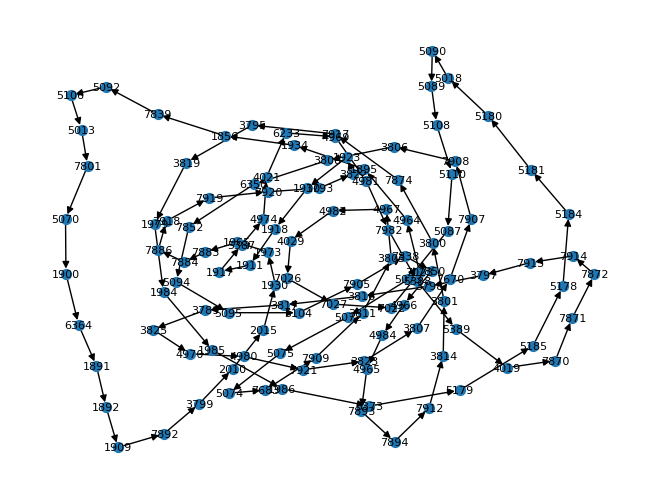

In [35]:
# Função para calcular a distância euclidiana entre dois pontos
def distance_between_points(origem, destino):
    return origem.distance(destino)

# Criar um Grafo Direcional vazio
grafo = nx.DiGraph()

# Adicionar nós ao grafo
for idx, row in gdf_paradas_encontradas.iterrows():
    grafo.add_node(row['parada'], pos=row['geometry'])  # 'row['parada'] como identificador do nó e 'geometry' para obter o ponto.

# Adicionar arestas orientadas entre os nós
num_paradas = len(gdf_paradas_encontradas)
for i in range(num_paradas):
    # Obter as coordenadas de origem e destino
    origem = gdf_paradas_encontradas.iloc[i]['parada']
    destino = gdf_paradas_encontradas.iloc[(i + 1) % num_paradas]['parada']

    origem_coords = grafo.nodes[origem]['pos']
    destino_coords = grafo.nodes[destino]['pos']

    # Calcular a distância entre as paradas
    distancia = distance_between_points(origem_coords, destino_coords)

    # Adicionar aresta orientada
    grafo.add_edge(origem, destino, distancia=distancia)

# Obter as posições dos nós usando o layout padrão do NetworkX
pos = nx.spring_layout(grafo, seed=42)

# Desenhar o grafo
nx.draw(grafo, pos, with_labels=True, node_size=50, font_size=8)


# Mostrar o desenho do grafo
plt.show()

In [2]:
# lendo os arquivos .shp
linhas = gpd.read_file('../databases/luiz_dataset/paradas_linestrings.csv')

In [5]:
linhas


,field_1,linha,paradas,geometry
0,0,0.018,geometry\n0 POINT (...,None
1,1,0.946,geometry\n0 POINT (...,None
2,2,0.373,geometry\n0 POINT (...,None
3,3,503.3,geometry\n0 POINT (...,None
4,4,531.1,geometry\n0 POINT (-4...,None
...,...,...,...,...
482,482,0.844,geometry\n0 POINT (...,None
483,483,0.172,geometry\n0 POINT (...,None
484,484,805.6,geometry\n0 POINT (...,None
485,485,506.2,geometry\n0 POINT (-4...,None


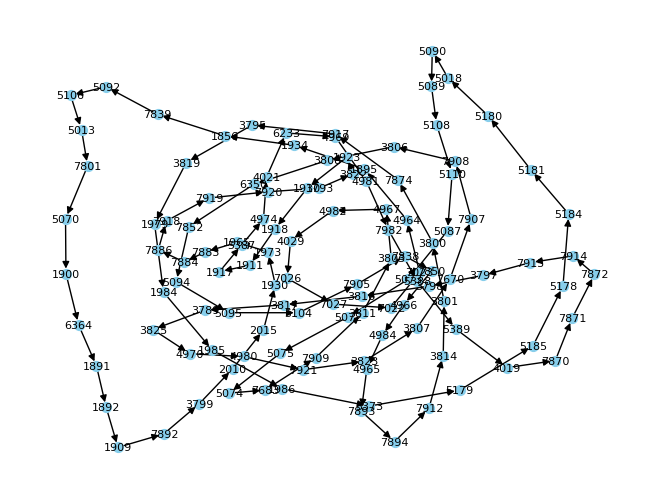

In [17]:
# Função para calcular a distância euclidiana entre dois pontos
def distance_between_points(origem, destino):
    return origem.distance(destino)

# Criar um Grafo Direcional vazio
grafo = nx.DiGraph()

# Adicionar nós ao grafo
for idx, row in gdf_paradas_encontradas.iterrows():
    grafo.add_node(row['parada'], pos=row['geometry'])  # 'row['parada'] como identificador do nó e 'geometry' para obter o ponto.

# Adicionar arestas orientadas entre os nós
num_paradas = len(gdf_paradas_encontradas)
for i in range(num_paradas):
    # Obter as coordenadas de origem e destino
    origem = gdf_paradas_encontradas.iloc[i]['parada']
    destino = gdf_paradas_encontradas.iloc[(i + 1) % num_paradas]['parada']

    origem_coords = grafo.nodes[origem]['pos']
    destino_coords = grafo.nodes[destino]['pos']

    # Calcular a distância entre as paradas
    distancia = distance_between_points(origem_coords, destino_coords)

    # Adicionar aresta orientada
    grafo.add_edge(origem, destino, distance=distancia)

# Obtenha as posições dos nós usando o layout Fruchterman-Reingold
pos = nx.spring_layout(grafo, seed=42)

# Desenhe o grafo
nx.draw(grafo, pos, with_labels=True, node_size=50, font_size=8, node_color='skyblue', arrows=True)
# nx.draw_networkx_edge_labels(grafo, pos, edge_labels={(u, v): f"{d['distance']:.2f}" for u, v, d in grafo.edges(data=True)})

plt.show()

In [25]:
# Criar um mapa
m = folium.Map(location=[-15.9, -48.0], zoom_start=12)

# Adicionar as paradas como marcadores no mapa
for parada, data in grafo.nodes(data=True):
    # print(data['pos'])
    # print(parada)
    lat, lon = data['pos'].y, data['pos'].x
    folium.Marker([lat, lon], popup=f'Parada {parada}').add_to(m)
    # folium.Marker(location=data['pos'], popup=f'Parada {parada}').add_to(m)

# # Adicionar as arestas ao mapa
for origem, destino, data in grafo.edges(data=True):
    # print(grafo.nodes[origem]['pos'])
    # print(grafo.nodes[destino]['pos'])
    origem_coords = (grafo.nodes[origem]['pos'].y, grafo.nodes[origem]['pos'].x) 
    destino_coords = (grafo.nodes[destino]['pos'].y, grafo.nodes[destino]['pos'].x)
    folium.PolyLine([origem_coords, destino_coords], color='blue', weight=2).add_to(m)

m

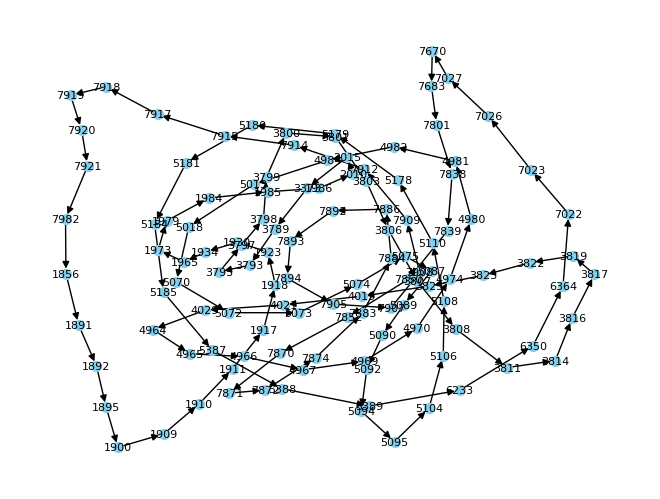

In [40]:
# Criando Grafo com o Data Frame ordando por paradas

# Função para calcular a distância euclidiana entre dois pontos
def distance_between_points(origem, destino):
    return origem.distance(destino)

# Criar um Grafo Direcional vazio
grafo = nx.DiGraph()

# Adicionar nós ao grafo
for idx, row in gdf_paradas_encontradas_sorted.iterrows():
    grafo.add_node(row['parada'], pos=row['geometry'])  # 'row['parada'] como identificador do nó e 'geometry' para obter o ponto.

# Adicionar arestas orientadas entre os nós
num_paradas = len(gdf_paradas_encontradas_sorted)
for i in range(num_paradas):
    # Obter as coordenadas de origem e destino
    origem = gdf_paradas_encontradas_sorted.iloc[i]['parada']
    destino = gdf_paradas_encontradas_sorted.iloc[(i + 1) % num_paradas]['parada']

    origem_coords = grafo.nodes[origem]['pos']
    destino_coords = grafo.nodes[destino]['pos']

    # Calcular a distância entre as paradas
    distancia = distance_between_points(origem_coords, destino_coords)

    # Adicionar aresta orientada
    grafo.add_edge(origem, destino, distance=distancia)

# Obtenha as posições dos nós usando o layout Fruchterman-Reingold
pos = nx.spring_layout(grafo, seed=42)

# Desenhe o grafo
nx.draw(grafo, pos, with_labels=True, node_size=50, font_size=8, node_color='skyblue', arrows=True)
# nx.draw_networkx_edge_labels(grafo, pos, edge_labels={(u, v): f"{d['distance']:.2f}" for u, v, d in grafo.edges(data=True)})

plt.show()